<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Final_Results/Initialisation_%26_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [59]:
# !pip install accelerate
# import accelerate

In [60]:
!pip install -q -U google-generativeai

In [61]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [62]:
model = genai.GenerativeModel('gemini-1.0-pro')

In [63]:
# response = model.generate_content("give me 50 values between 5 and -5, just give the values in a comma seperated manner, and nothing else")
# print(response.text)

In [64]:
# !CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
# !pip install huggingface_hub
# !pip install llama-cpp-python==0.1.78
# !pip install numpy==1.23.4

In [65]:
# model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
# model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [66]:
# from huggingface_hub import hf_hub_download
# from llama_cpp import Llama
# import matplotlib.pyplot as plt

In [67]:
# model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

In [68]:
# # GPU
# lcpp_llm = None
# lcpp_llm = Llama(
#     model_path=model_path,
#     n_threads=2, # CPU cores
#     n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
#     n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
#     )

In [69]:
# lcpp_llm.params.n_gpu_layers

### Generating Population with Quasi Initialisation

In [70]:
# method =' Quasi-Random Sequence'
# prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
# prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

# USER: {prompt}

# ASSISTANT:
# '''

In [71]:
method =' Quasi-Random Sequence'
response = model.generate_content("Generate 20 numbers between -10 and 10 using the Quasi-Random Sequence method. The numbers should have exactly 2 decimal places and be returned as a comma-separated list with no additional text or formatting.")
print(response.text)

2025-01-17 02:15:49,363 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 6144.62ms


-8.81, -6.85, -2.16, -8.02, -0.84, 9.71, 3.76, 6.69, 4.16, 7.93, -7.29, -4.92, 0.72, 5.37, 1.52, -9.48, -6.36, -2.78, -7.59, -0.41


In [72]:
Quasi_Random_Sequence_Initialisation = [float(x) for x in response.text.split(",")]

# Print the array
numbers = Quasi_Random_Sequence_Initialisation
print(Quasi_Random_Sequence_Initialisation)

[-8.81, -6.85, -2.16, -8.02, -0.84, 9.71, 3.76, 6.69, 4.16, 7.93, -7.29, -4.92, 0.72, 5.37, 1.52, -9.48, -6.36, -2.78, -7.59, -0.41]


In [73]:
# response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                   repeat_penalty=1.2, top_k=150,
#                   echo=True)

In [74]:
# print(response)

In [75]:
# import re

# text_response = response['choices'][0]['text']

# # Use a regular expression to find all numbers in the response
# numbers = re.findall(r'-?\d+\.\d+', text_response)

# # Convert the numbers to floats
# numbers = [float(num) for num in numbers]

# Quasi_Random_Sequence_Initialisation = numbers
# print(Quasi_Random_Sequence_Initialisation)

### PSO Parameters

In [76]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

In [77]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [78]:
def sphere(x):
    return sum(x**2)

In [79]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [80]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

20


In [81]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [82]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [83]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))


20


In [84]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [85]:
w_values = []  # To store weight values
g_values = []  # To store global best cost values

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    # Store the global best cost
    g_values.append(GlobalBest['Cost'])

    # Generate new weight using the API
    response = model.generate_content(
        f"Given the following information:\n"
        f"1. Last 5 Weight Values: {w_values[-5:]}. These weights influence the optimization objective.\n"
        f"2. Last 5 Cost Values: {g_values[-5:]}. These costs represent the results of applying the respective weights, and the goal is to minimize them.\n"
        f"3. Optimization Context: Analyze the trends and suggest a new weight value that continues to reduce the cost effectively. "
        f"Focus on identifying patterns and ensuring the cost reduction objective is met.\n"
        f"4. Precision: The new weight should be returned as a single numerical value rounded to exactly 4 decimal places.\n"
        f"5. Output Format: Return only the new weight value without any additional text or explanation.\n\n"
        f"Provide the output as a single number."
    )

    new_weight = float(response.text.strip())  # Extract the new weight

    # Update the weight and append it to w_values
    w = new_weight
    w_values.append(w)

    # Print iteration details
    print(f"Iteration {it + 1}: Best Cost = {GlobalBest['Cost']}, New Weight = {new_weight}")

# Print final weights
print("All Weights:", w_values)


2025-01-17 02:15:58,173 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2453.15ms


Iteration 1: Best Cost = 1.6809999999999994, New Weight = 0.001


2025-01-17 02:16:01,146 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2954.52ms


Iteration 2: Best Cost = 1.6809999999999994, New Weight = 0.0009


2025-01-17 02:16:03,997 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2835.93ms


Iteration 3: Best Cost = 1.229237983654165, New Weight = 0.0008


2025-01-17 02:16:06,725 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2702.86ms


Iteration 4: Best Cost = 1.229237983654165, New Weight = 0.0007


2025-01-17 02:16:09,622 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2886.38ms


Iteration 5: Best Cost = 0.8631942772667984, New Weight = 0.0006


2025-01-17 02:16:12,333 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2706.35ms


Iteration 6: Best Cost = 0.6813114839374347, New Weight = 0.0005


2025-01-17 02:16:31,246 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 18903.48ms


Iteration 7: Best Cost = 0.60063447102356, New Weight = 0.0004


2025-01-17 02:16:33,094 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1831.62ms


Iteration 8: Best Cost = 0.3789034587377577, New Weight = 0.0003


2025-01-17 02:16:34,924 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1821.86ms


Iteration 9: Best Cost = 0.21437474267032786, New Weight = 0.0002


2025-01-17 02:16:36,756 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1822.94ms


Iteration 10: Best Cost = 0.052586755404054095, New Weight = 0.0001


2025-01-17 02:16:38,839 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2074.36ms


Iteration 11: Best Cost = 0.03344940403330995, New Weight = 5e-05


2025-01-17 02:16:40,854 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2004.56ms


Iteration 12: Best Cost = 0.031176752031585604, New Weight = 5e-05


2025-01-17 02:16:42,763 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1899.75ms


Iteration 13: Best Cost = 0.013998890565475194, New Weight = 5e-05


2025-01-17 02:16:44,694 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1924.20ms


Iteration 14: Best Cost = 0.009531324493960311, New Weight = 2.5e-05


2025-01-17 02:16:48,951 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 4248.35ms


Iteration 15: Best Cost = 0.00660514397957562, New Weight = 1e-05


2025-01-17 02:16:50,783 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1821.09ms


Iteration 16: Best Cost = 0.004892337626560269, New Weight = 5e-06


2025-01-17 02:16:52,790 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1998.98ms


Iteration 17: Best Cost = 0.00436048739892975, New Weight = 4e-06


2025-01-17 02:16:54,625 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1824.50ms


Iteration 18: Best Cost = 0.0031775926316788793, New Weight = 2.5e-06


2025-01-17 02:16:58,881 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 4247.57ms


Iteration 19: Best Cost = 0.001093990796007483, New Weight = 1e-06
Iteration 20: Best Cost = 0.0007979843687096447, New Weight = 5e-07
All Weights: [0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001, 5e-05, 5e-05, 5e-05, 2.5e-05, 1e-05, 5e-06, 4e-06, 2.5e-06, 1e-06, 5e-07]


2025-01-17 02:17:00,736 - tornado.access - INFO - 200 POST /v1beta/models/gemini-1.0-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1845.64ms


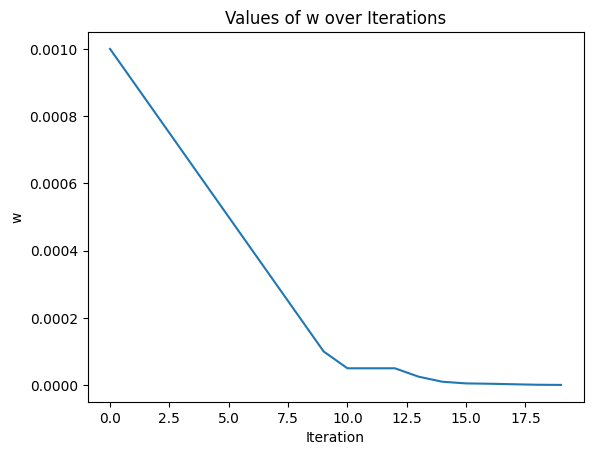

In [86]:
import matplotlib.pyplot as plt
plt.plot(w_values)
plt.xlabel("Iteration")
plt.ylabel("w")
plt.title("Values of w over Iterations")
plt.show()

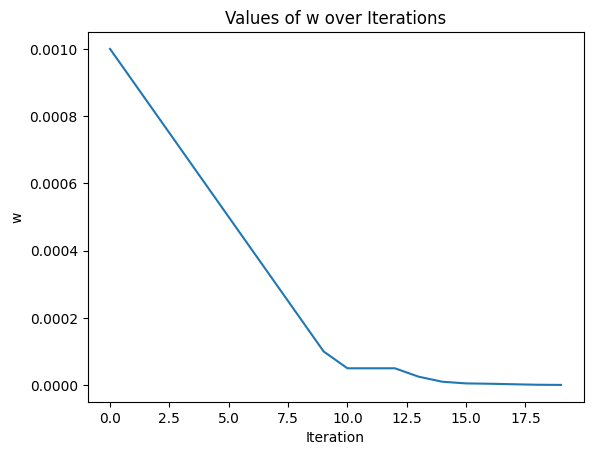

In [87]:
plt.plot(w_values)
plt.xlabel("Iteration")
plt.ylabel("w")
plt.title("Values of w over Iterations")
plt.show()

[1.6809999999999994, 1.6809999999999994, 1.229237983654165, 1.229237983654165, 0.8631942772667984, 0.6813114839374347, 0.60063447102356, 0.3789034587377577, 0.21437474267032786, 0.052586755404054095, 0.03344940403330995, 0.031176752031585604, 0.013998890565475194, 0.009531324493960311, 0.00660514397957562, 0.004892337626560269, 0.00436048739892975, 0.0031775926316788793, 0.001093990796007483, 0.0007979843687096447]


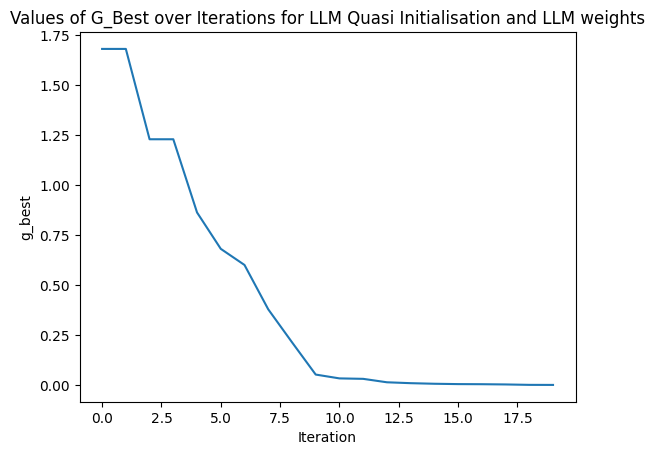

In [88]:
G_values_Quasi_weights = g_values
print(G_values_Quasi_weights)

plt.plot(G_values_Quasi_weights)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for LLM Quasi Initialisation and LLM weights")
plt.show()

[1.6809999999999994, 1.6809999999999994, 1.229237983654165, 1.229237983654165, 0.8631942772667984, 0.6813114839374347, 0.60063447102356, 0.3789034587377577, 0.21437474267032786, 0.052586755404054095, 0.03344940403330995, 0.031176752031585604, 0.013998890565475194, 0.009531324493960311, 0.00660514397957562, 0.004892337626560269, 0.00436048739892975, 0.0031775926316788793, 0.001093990796007483, 0.0007979843687096447]


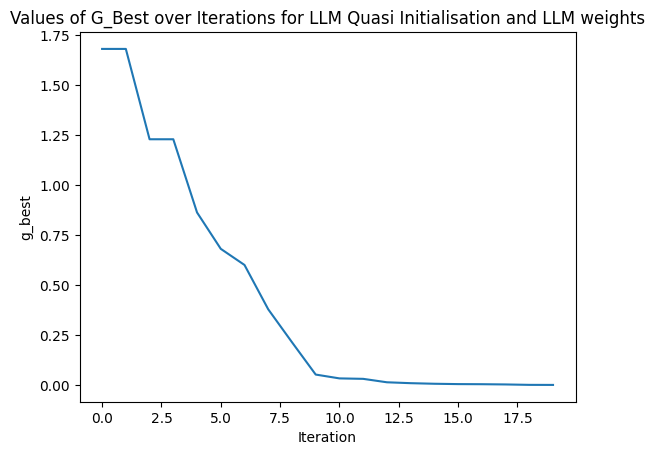

In [89]:
G_values_Quasi_weights = g_values
print(G_values_Quasi_weights)

plt.plot(G_values_Quasi_weights)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for LLM Quasi Initialisation and LLM weights")
plt.show()